**Approximation du nombre $\pi$**
==================

Le nombre $\pi$ est un nombre qui a toujours fasciné les mathématiciens,
notamment sa suite infine de décimales. C'est une des constantes les
plus importantes en mathématiques, que l'on retrouve dans différentes
formules qui régissent les lois de l'univers, en géométrie,
probabilités, trigonométrie, intégration, physique, ingénierie, et bien
sûr en informatique. Disposer d'une approximation numérique de ce nombre
devient alors une nécessité pour les scientifiques, ingénieurs,
enseignants et étudiants. Comme vu en cours et TD, certains nombres
réels ne sont pas calculables par une Machine de Turing. Malheureusement,
c'est le cas pour le nombre $\pi$.


Le but ce projet est de présenter quelques méthodes, basées sur
deux principes mathématiques différents, pour calculer une approximation
du nombre $\pi$. Certaines méthodes peuvent être plus ou moins efficaces
(convergence, précision) en fonction du nombre d'itérations, et il
pourrait être intéressant de pouvoir étudier ces différences.

Méthode des séries
==================

Somme des inverses des carrés
-----------------------------

Dans cette sous-section on s'intéresse à la convergence de la série
$\sum \frac{1}{n^2}$, et on se propose de (re)démontrer que cette série
converge vers $\frac{\pi^2}{6}$. Pour ce faire, on utilise le
développement en série de Fourier d'une fonction $f$ définie par le
graphique suivant :
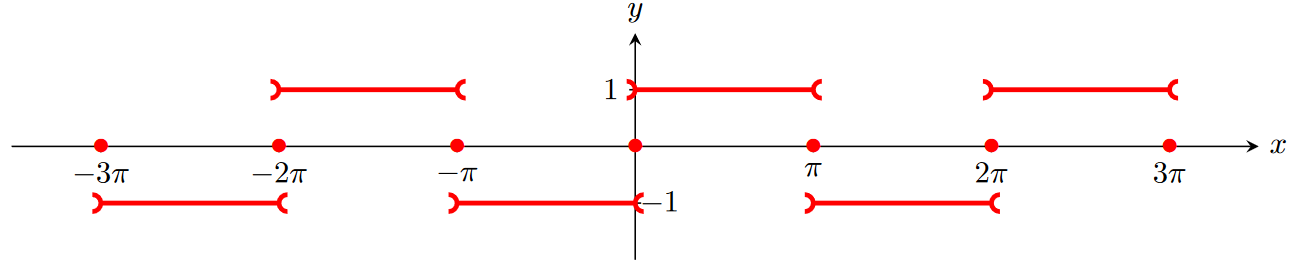

La fonction $f$ est 2$\pi$-périodique, valant 1 sur l'intervalle
$]0,\pi[$, $-1$ sur l'intervalle $]-\pi,0[$, et vérifiant
$f(-\pi)=f(0)=f(\pi)=0$. Le développement en série de Fourier $S_N(f)$
de la fonction $f$ est défini (dans sa variante réelle) par :

$$S_N(f) = a_0 + \sum_{n=1}^{N} a_n \cos(nt) + \sum_{n=1}^{N} b_n \sin(nt)$$

avec $\forall n \in \mathbb{N}^*$

$$a_0 = \frac{1}{2\pi} \int_{0}^{2\pi} f(t) dt$$
$$a_n = \frac{2}{2\pi} \int_{0}^{2\pi} f(t) \cos(nt) dt$$
$$b_n  = \frac{2}{2\pi} \int_{0}^{2\pi} f(t) \sin(nt) dt$$

1.  Montrer que $a_0 = 0$, et que $\forall n \geqslant 1$, $a_n=0$ et
    $b_n = \dfrac{4}{2\pi} \left( \dfrac{1 - \cos(n\pi)}{n} \right)$

2.  En étudiant la parité de $n$, en déduire que pour tout entier
    naturel $p$, $b_{2p} = 0$ et $b_{2p+1} = \dfrac{4}{(2p+1)\pi}$

3.  On rappelle le Théorème de Parseval :

    Soit $f$ une fonction continue par morceau, et 2$\pi$-périodique.
    Alors on a l'égalité suivante :
    $$\frac{1}{2\pi} \int_{0}^{2\pi}|f(t)|^2dt=  |a_0|^2 + \frac{1}{2} \left( \sum_{n=1}^{+\infty}|a_n|^2 + |b_n|^2 \right)$$
    vec $a_n$ et $b_n$ désignant les coefficients de Fourier réels de
    $f$.

    En appliquant le théorème de Parseval à la fonction $f$,
    montrer que $$\label{serie2}
    \sum_{p=0}^{+\infty} \dfrac{1}{(2p+1)^2} = \dfrac{\pi^2}{8}$$
    Cette série sera appelée la *série impaire*.

4.  En remarquant que
    $$\sum_{n=1}^{2N} \frac{1}{n^2} = \sum_{p=1}^{N} \frac{1}{(2p)^2} + \sum_{p=0}^{N-1} \frac{1}{(2p+1)^2}$$

    , en simplifiant l'expression puis en passant à la limite en
    l'infini, montrer que :

    $$\sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{1}{4} \sum_{n=1}^{+\infty} \frac{1}{n^2} + \frac{\pi^2}{8}$$

5.  Finalement, en déduirela valeur de la *série paire*

    $$\label{serie1}
     \sum_{n=1}^{+\infty} \frac{1}{n^2}$$

Implémentations
---------------

1.  Implémenter une fonction *SerieInvCarres(N)* renvoyant calculant les
    $N$ premiers termes de la somme $$\sum_{n=1}^{N} \frac{1}{n^2}$$

In [31]:
def SerieInvCarres(p_iPremiersTermes) :
    l_fSum = 0
    for l_index in range (1, p_iPremiersTermes + 1 ) :
        l_fSum += (1/pow(l_index,2))
    return l_fSum

SerieInvCarres(2)

2.  En utilisant l'équation *série paire*, implémenter une fonction
    *MethodeSerieInvCarres(N)* renvoyant une approximation du nombre
    $\pi$.

In [18]:
import math

def MethodeSerieInvCarres(p_iPremiersTermes) :
    return math.sqrt(6*SerieInvCarres(p_iPremiersTermes))

MethodeSerieInvCarres(9999)

3.1414971543976273

3.  Implémenter une fonction *SerieInvCarresImparis(N)* renvoyant
    calculant les $N$ premiers termes de la somme
    $$\sum_{n=0}^{N} \frac{1}{(2n+1)^2}$$

In [21]:
def SerieInvCarresImpaires(p_iPremiersTermes):
    l_fSum = 0
    for l_index in range (0 , p_iPremiersTermes + 1):
        l_fSum += 1/pow((2*l_index)+1,2)
    return l_fSum

SerieInvCarresImpaires(2)

1.1511111111111112

4.  En utilisant l'équation *série impaire*, implémenter une fonction
    *MethodeSerieInvCarresImparis(N)* renvoyant une approximation du
    nombre $\pi$.

In [23]:
def MethodeSerieInvCarresImpaires(p_iPremiersTermes) :
    return math.sqrt(8*SerieInvCarresImpaires(p_iPremiersTermes))

MethodeSerieInvCarresImpaires(9999)

3.1415608224399487

5.  Pour chacune des deux méthodes ci-dessus, tracer la courbe
    représentant l'évolution de $|MethodeSerieXXX(N) - \pi|$ en fonction
    de $N$

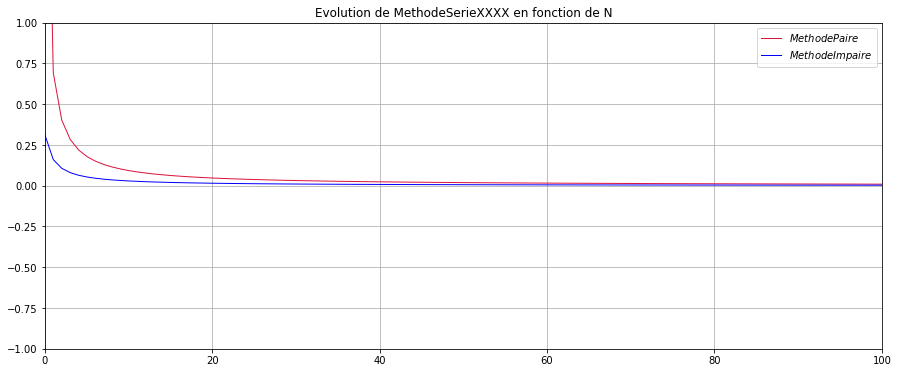

In [33]:
from sympy import *
import numpy as np

# pour tracer des courbes
import matplotlib.pyplot as plt

# Créer un tableau echantillonné sur tab_x 
methodSample_y = lambda function,tab_x : [abs(function(int(index))-np.pi) for index in tab_x]


def plotMethodeSeries(p_iPremiersTermes):
    global_x = np.linspace(0, p_iPremiersTermes, p_iPremiersTermes)
    
    paire_y = methodSample_y(MethodeSerieInvCarres,global_x)

    impaire_y = methodSample_y(MethodeSerieInvCarresImpaires,global_x)

    plt.figure(figsize=(15, 6))
    plt.plot(global_x, paire_y, linewidth=1 , color='crimson' ,label='$MethodePaire$')
    plt.plot(global_x, impaire_y, linewidth=1 , color='blue' ,label='$MethodeImpaire$')
    plt.title('Evolution de MethodeSerieXXXX en fonction de N')
    plt.grid()
    plt.axis([0, p_iPremiersTermes, -1, 1])
    plt.legend()
    plt.show()
    
plotMethodeSeries(100)

6.  Pour chacune des deux méthodes ci-dessus, combien faut-il de termes
    $N$ dans la somme pour obtenir une approximation de $\pi$ avec une
    précision de l'ordre de $10^{-4}$ ?

In [57]:
def giveMeTheN(p_tab,p_Precision):
    out_N = 0
    for l_Value in p_tab :
        if (l_Value <= pow(10,-p_Precision)):
            return out_N
        out_N+=1
    print ("Il faut plus de valeurs.")
    return out_N

def findNumberOf_N_Needed(p_iPremiersTermes,p_Precision):
    global_x = np.linspace(0, p_iPremiersTermes, p_iPremiersTermes)
    
    # Methode Paire
    paire_y = methodSample_y(MethodeSerieInvCarres,global_x)
    
    l_N = giveMeTheN(paire_y,p_Precision)
        
    print ("Methode Paire il faut " + str(l_N) + " termes à 10^-" + str(p_Precision))
    
    # Methode Impaire
    impaire_y = methodSample_y(MethodeSerieInvCarresImpaires,global_x)
    
    l_N = giveMeTheN(impaire_y,p_Precision)
    
    print ("Methode Impaire il faut " + str(l_N) + " termes à 10^-" + str(p_Precision))
    
        
findNumberOf_N_Needed(9600,4)
# Methode Paire il faut 9549 termes à 10^-4
# Methode Impaire il faut 3183 termes à 10^-4

Methode Paire il faut 9549 termes à 10^-4
Methode Impaire il faut 3183 termes à 10^-4


7.  Le célèbre mathématicien Ramanujan proposa, de manière
    quasi-magique, un certain nombre de formules permettant d'approximer
    le nombre $\pi$. Une des formules proposées peut s'énoncer comme
    suit :
    $${\frac {1}{\pi }}={\frac {2{\sqrt {2}}}{9801}}\displaystyle \sum _{n=0}^{\infty }{\frac {(4n)!}{(n!)^{4}}}\times {\frac {1103+26390n}{(4\times 99)^{4n}}}$$
    Implémenter une fonction *MethodeSerieRamanujan(N)*, basée sur cette
    équation, renvoyant une approximation du nombre $\pi$.

In [60]:
def MethodeSerieRamanujan(p_iPremiersTermes):
    l_fSum = 0
    l_fConst = (2/9801)*math.sqrt(2)
    
    for l_index in range (0,p_iPremiersTermes + 1) :
        l_fSum += (math.factorial(4*l_index) / pow(math.factorial(l_index),4)) * ((1103+26390*l_index)/(pow(4*99,4*l_index)))
        
    return 1/(l_fConst*l_fSum)

MethodeSerieRamanujan(100)

8.  Déterminer combien cette méthode fournit de décimales
    supplémentaires à $\pi$ à chaque nouveau terme de la série.

In [148]:
#from decimal import *
#decimal.getcontext().prec = 100
# Raison obscure, ça ne marche pas ..

def PrintRamanunjan(p_iPremiersTermes):
    l_iDecimalFound = 0
    l_bFlagPiFound = False
    for l_index in range (0, p_iPremiersTermes + 1) :
        
        l_iNewDecimal = 0
        l_fValue = MethodeSerieRamanujan(l_index)
        
        while True :
            if(round(l_fValue,l_iNewDecimal) == round(np.pi,l_iNewDecimal)):
                
                l_iNewDecimal += 1
                
                # Avoid infinite loop
                if(round(l_fValue,l_iNewDecimal) == np.pi):
                    l_bFlagPiFound = True
                    break
                                 
            else :
                break
            
        print ("Rang " + str(l_index) + " : " + str(l_fValue) + " / Nouvelles décimales trouvées : " + str(l_iNewDecimal - l_iDecimalFound))
        l_iDecimalFound = l_iNewDecimal
        
        if (l_bFlagPiFound):
            print ("WE FOUND PI !")
            break

PrintRamanunjan(20)
#Rang 0 : 3.1415927300133055 / Nouvelles décimales trouvées : 8
#Rang 1 : 3.1415926535897936 / Nouvelles décimales trouvées : 7
#Rang 2 : 3.141592653589793 / Nouvelles décimales trouvées : 0
#WE FOUND PI !
# Commentaire : np.pi est utilisé pour le calcul, il n'est peut être pas assez précis, seulement 15 chiffres après la virgule

Rang 0 : 3.1415927300133055 / Nouvelles décimales trouvées : 8
Rang 1 : 3.1415926535897936 / Nouvelles décimales trouvées : 7
Rang 2 : 3.141592653589793 / Nouvelles décimales trouvées : 0
WE FOUND PI !


9.  Discuter et comparer l'efficacité des trois méthodes présentées
    ci-dessus. Quels peuvent être les avantages et les inconvénients de
    chacune ?

Méthode de Monte-Carlo
======================

\"Le terme \"méthode de Monte-Carlo\", ou \"méthode Monte-Carlo\",
désigne une famille de méthodes algorithmiques visant à calculer une
valeur numérique approchée en utilisant des procédés aléatoires,
c'est-à-dire des techniques probabilistes. Le nom de ces méthodes, qui
fait allusion aux jeux de hasard pratiqués à Monte-Carlo, a été inventé
en 1947 par Nicholas Metropolis.\"

 

On se propose d'utiliser cette méthode pour obtenir une approximation du
nombre $\pi$. Considérons $\mathcal{D}$ la portion de disque définie par :

$$\mathcal{D} = \{ (x,y) \in \mathbb{R}^{+} ~|~ x^2 + y^2 \leqslant 1 \}$$

Le principe de la méthode est de choisir aléatoirement un grand nombre
de points dans le carré $[0,1]\times [0,1]$ et d'observer combien de ces
points se situent dans le quart de disque $\mathcal{D}$. On notera $n$
le nombre de points tirés, et $k_n$ le nombre de ces points qui se
situent dans $\mathcal{D}$.

1.  Déterminer l'aire de la portion de disque $\mathcal{D}$. En se
    basant sur le calcul précédent, quel à votre avis la valeur de
    $\lim\limits_{n \to \infty} \frac{k_n}{n}$ ?

aire de la portion D : pi/4
la valeur de cette limite tend vers pi/4, a priori

2.  Implémenter une fonction *Tirage(n)* permettant de tirer $n$ points
    dans $[0,1]\times [0,1]$ et de calculer $\frac{k_n}{n}$.

In [142]:
import random

def randomPoints(p_N):
    
    l_aPoints = []
    
    for l_index in range (0,p_N) :
        
        l_aNewPoint = [random.random(),random.random()]
        l_aPoints.append(l_aNewPoint)
    
    return l_aPoints

def isInCircle(p_aPoints):
    if ( (pow(p_aPoints[0],2)+pow(p_aPoints[1],2)) <= 1 ) :
        return True
    else :
        return False

def Tirage(p_N):
    
    l_aPoints = randomPoints(p_N)
    
    l_Kn = 0 
    
    for l_Point in l_aPoints :
        if ( isInCircle(l_Point) ) :
            l_Kn+=1
            
    return l_Kn/p_N
    
Tirage(10000)

3.  Représenter le carré $[0,1]\times [0,1]$, le disque $\mathcal{D}$
    (ou seulement le cercle associé), et le tirage des $n$ points, en
    colorant de manière différente les points à l'intérieur et à
    l'extérieur du disque $\mathcal{D}$.

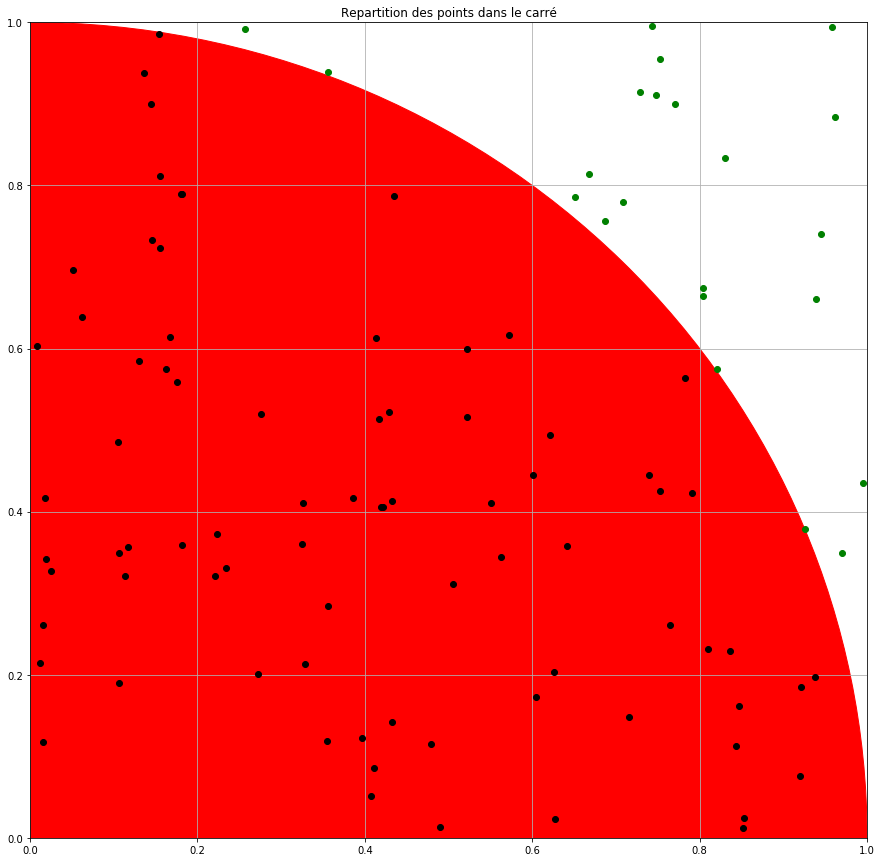

In [147]:
def plotSquareAndPoints(p_N):
      
    # Declare array     
    x_good = []
    y_good = []
    x_bad = []
    y_bad = []
    
    l_aPoints = randomPoints(p_N)

    # Fill arrays
    for l_Point in l_aPoints :
        if(isInCircle(l_Point)):
            x_good.append(l_Point[0])
            y_good.append(l_Point[1])
        else :
            x_bad.append(l_Point[0])
            y_bad.append(l_Point[1])

    # Plot
    plt.figure(figsize=(15, 15))
    circle = plt.Circle((0, 0), 1, color='r')
    plt.gcf().gca().add_artist(circle)
    plt.plot(x_good, y_good, 'o' , color='black')
    plt.plot(x_bad, y_bad, 'o' , color='green')
    plt.title('Repartition des points dans le carré')
    plt.grid()
    plt.axis([0, 1, 0 , 1])
    plt.show()
    
plotSquareAndPoints(100)

4.  Implémenter une fonction *MonteCarlo(n)* renvoyant une approximation
    de $\pi$.

In [209]:
def MonteCarlo(p_N):
    return 4*Tirage(p_N)

MonteCarlo(10000)

5.  Représenter sous forme de nuage de points la quantité
    $|MonteCarlo(n) - \pi|$ en fonction de $n$. La méthode
    converge-t-elle ? Dans quel sens ?

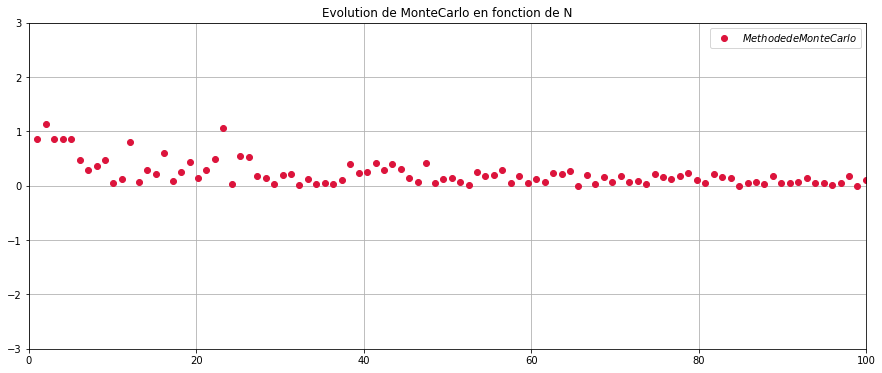

In [213]:
def plotMonteCarlo(p_N):
    global_x = np.linspace(1, p_N, p_N - 1)
    
    MonteCarlo_y = methodSample_y(MonteCarlo,global_x)
    
    plt.figure(figsize=(15, 6))
    plt.plot(global_x, MonteCarlo_y, 'o' , color='crimson' ,label='$Methode de Monte Carlo$')
    plt.title('Evolution de MonteCarlo en fonction de N')
    plt.grid()
    plt.axis([0, p_N, -3, 3])
    plt.legend()
    plt.show()
    
plotMonteCarlo(100)

6.  Combien faut-il tirer de points $n$ (en moyenne) pour obtenir une
    approximation de $\pi$ avec une précision de l'ordre de $10^{-4}$ ?

In [ ]:
def findMeN_MonteCarlo():
    while (True ) :
        if 

7.  Quels sont les inconvénients et les avantages de cette méthode par
    rapport aux méthodes des séries ?

Ouverture
=========

-   Citer au moins une autre méthode (basée sur un principe mathématique
    différent) permettant d'approximer le nombre $\pi$ et expliquer
    brièvement son principe.

-   (Bonus -- Pour les plus passionnés) Imaginer une nouvelle méthode
    permettant d'obtenir une approximation du nombre $\pi$.

Rendu du projet
===============

Le travail sur ce projet est à faire par binôme (2 personnes maximum).
Le travail sera restitué sous la forme d'un Notebook.
Le projet est à rendre sur Moodle.



Le Notebook doit répondre à toutes les questions
posées dans l'énoncé, implémenter les algorithmes demandés,
et si cela s'avère nécessaire expliquer comment ces algorithmes
ont été implémentés en pratique.
Le Notebook se terminera par une discussion des résultats
et une conclusion.
La qualité, propreté et clarté de la rédaction seront pris en compte.